## **COVID19 Data Analysis using Python**
## (Guided Project)
### In this Course we are going to work with COVID19 dataset, published by John Hopkins University, which consists of the data related to cumulative number of confirmed cases, per day, in each Country. Also we have another dataset which consists of various life factors, scored by the people living in each country around the globe.  

##

## *The question we want to answer is, whether there is a correlation between the spread of the virus in each country, and the happiness measure of that country (how happy the residents are).*

##

## **Project Structure**
### The hands on project on COVID19 Data Analysis using Python is divided into the following tasks:

## Task 1: Importing COVID19 dataset 
### Import COVID19 dataset and prepare it for the analysis by dropping columns and aggregating rows.

## Task 2: Finding a good Measure 
### Decide on and calculate a good measure for our analysis.

## Task 3: Importing World happiness report dataset 
### Import World happiness report dataset, dropping useless columns and merge it with COVID19 dataset to find correlations among our data.

## Task 4: Visualizing the results 
### Visualize our results using Seaborn.

##

In [1]:
# Lest start by importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import scipy.stats as stats
print("All the modules are imported!")

All the modules are imported!


##

## Task 1: Import COVID19 dataset and prepare it for the analysis by dropping columns and aggregating rows.

In [2]:
# Import the covid confirmed cases dataset
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")

In [3]:
# Checking out the form and shape of the dataframe
corona_dataset_csv.head() # To check out the form of the dataframe

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_dataset_csv.shape # To find out the total number of rows and columns in the dataframe

(266, 104)

In [5]:
# Drop a couple of redundant columns
corona_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)
corona_dataset_csv

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Groupby Country and aggregate the cummulative cases columns
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
# Drop the "Province/State" column to avoid errors
data_agg = corona_dataset_aggregated.iloc[:, 1:]

In [7]:
data_agg.shape

(187, 100)

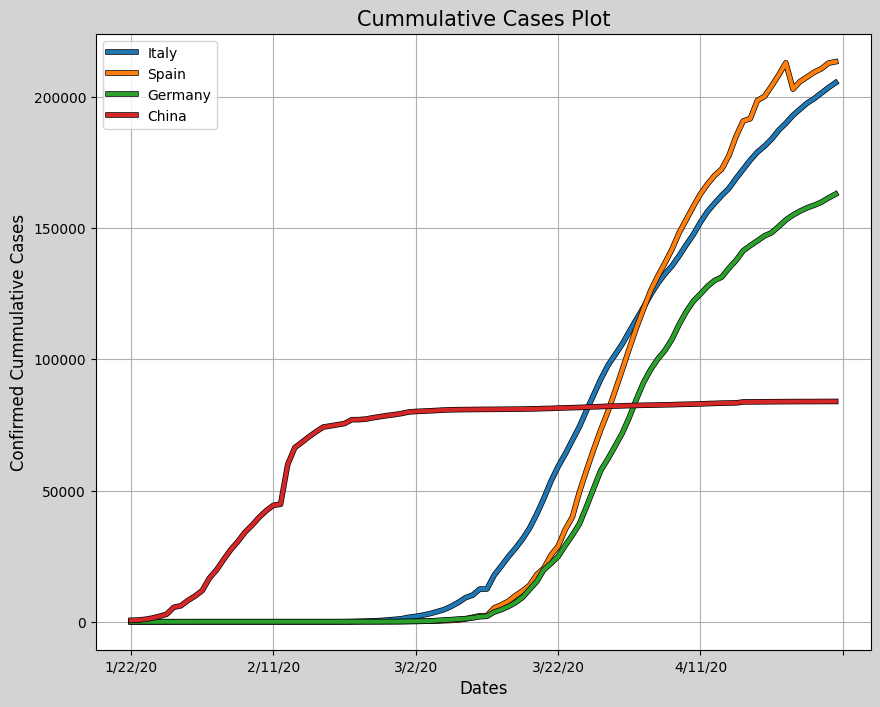

In [8]:
# Basic ploting of cummulative data on a few countries
plt.figure(figsize=(10,8), facecolor="lightgrey")
data_agg.loc["Italy"].plot(linewidth=3, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
data_agg.loc["Spain"].plot(linewidth=3, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
data_agg.loc["Germany"].plot(linewidth=3, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
data_agg.loc["China"].plot(linewidth=3, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Confirmed Cummulative Cases", fontsize=12)
plt.title("Cummulative Cases Plot", fontsize=15)
plt.legend()
plt.grid()
plt.show()

##

## Task 2: Decide on and calculate a good measure for our analysis.

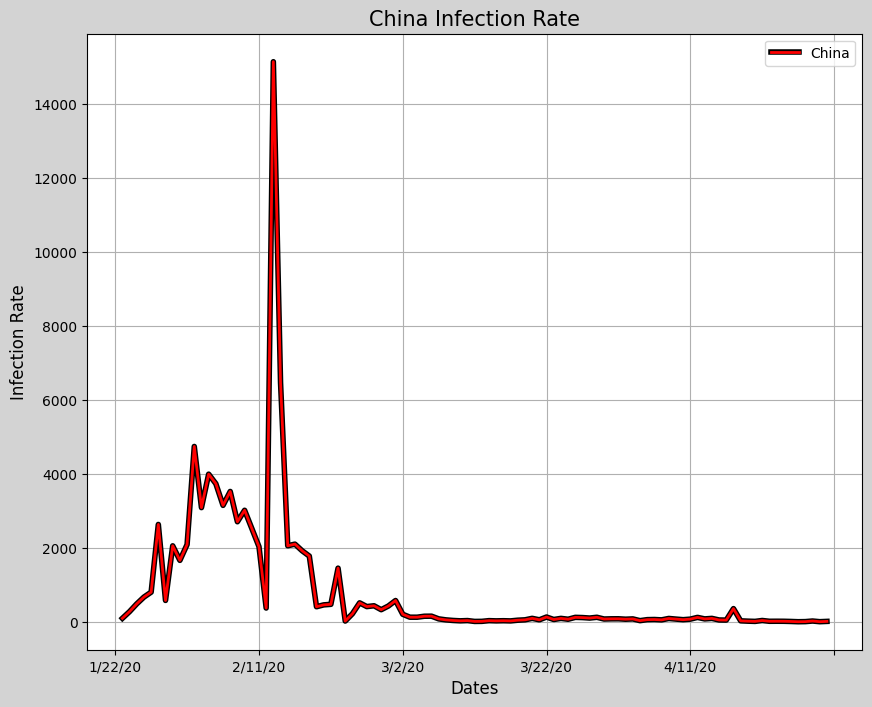

In [9]:
# We need to calculate the infection rate / rate of change in the daily confirmed infections
# This would be a nice measure of the impact the virus had in each country
# To do this, we can use the .diff() function
# Lets use China as an example to plot this rate of infection (first derivative of the cummulative function)
plt.figure(figsize=(10,8), facecolor="lightgrey")
data_agg.loc["China"].diff().plot(linewidth=2, color="red", path_effects=[pe.withStroke(linewidth=4, foreground="black")])
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Infection Rate", fontsize=12)
plt.title("China Infection Rate", fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [10]:
# Lets find out the maximum infection rate
# This will mean the maximum infections recorded in 24 hours
china_max_rate = data_agg.loc["China"].diff().max()
print("The maximum infection rate recorded for China, was", china_max_rate, "infections in a single day.")

The maximum infection rate recorded for China, was 15136.0 infections in a single day.


In [11]:
# Lets find the maximum infection rate for a few more countries
china_max_rate = data_agg.loc["Italy"].diff().max()
print("The maximum infection rate recorded for Italy, was", china_max_rate, "infections in a single day.")

The maximum infection rate recorded for Italy, was 6557.0 infections in a single day.


In [12]:
china_max_rate = data_agg.loc["Spain"].diff().max()
print("The maximum infection rate recorded for Spain, was", china_max_rate, "infections in a single day.")

The maximum infection rate recorded for Spain, was 9630.0 infections in a single day.


In [13]:
# Now we need to expand on this, and calculate the max rates of infection, for all the countries in the database
# First, lets create a list of the existing countries
countries = list(data_agg.index)
# Also, an empty list to append with the max infection rates as they are calculated
max_infection_rates = []

# Now we use a simple loop to populate the max_infection_rates list
for c in countries:
    max_infection_rates.append(data_agg.loc[c].diff().max())

# Now we will add the max_infection_rates list as a column in our data_agg dataframe
data_agg["max_infection_rates"] = max_infection_rates
data_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [14]:
# Now that we have calculated the maximum infection rates for each country, we dont need the cummulative data anymore
# we can create a new dataframe, keeping only the max_infection_rates column
corona_data = data_agg[["max_infection_rates"]]
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


##

## Task 3: Import World happiness report dataset, dropping useless columns and merge it with COVID19 dataset to find correlations among our data.

In [15]:
# Importing the dataset and checking out the structure
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
# Drop some columns which will be irrelevant to our question
happiness_report_csv.drop(columns=["Overall rank", "Generosity", "Perceptions of corruption"], inplace=True)
happiness_report_csv.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [17]:
# Set the name of the countries as index for this dataframe
happiness_report_csv.set_index("Country or region", inplace=True)
happiness_report_csv.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [18]:
# Now we will merge the two dataframes
# Lets start by ckecking the dimensions of each
print(corona_data.shape)
print(happiness_report_csv.shape)

(187, 1)
(156, 5)


In [19]:
# There are less rows (countries) in the happiness report data
# Its best to use an inner join
data = corona_data.join(happiness_report_csv, how="inner")
data.head()

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283


In [20]:
# Lets calculate some quick statistics and paired correlations of this dataset
data.describe()

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1089.944056,5.404343,0.892392,1.201986,0.728902,0.393748
std,3120.702758,1.125503,0.401240,0.306334,0.230101,0.146585
min,1.000000,2.853000,0.000000,0.000000,0.105000,0.000000
25%,31.000000,4.541000,0.576000,1.036000,0.544500,0.300500
50%,107.000000,5.373000,0.960000,1.274000,0.789000,0.418000
75%,530.500000,6.178000,1.203500,1.447000,0.877500,0.508000
max,26849.000000,7.769000,1.684000,1.624000,1.141000,0.631000


In [21]:
# The correlation matix will show us levels of correlation between the features
# Each cell displays the Pearson-r Correlation Coefficient
data.corr()

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000


##

## Task 4: Visualize our results using Seaborn.

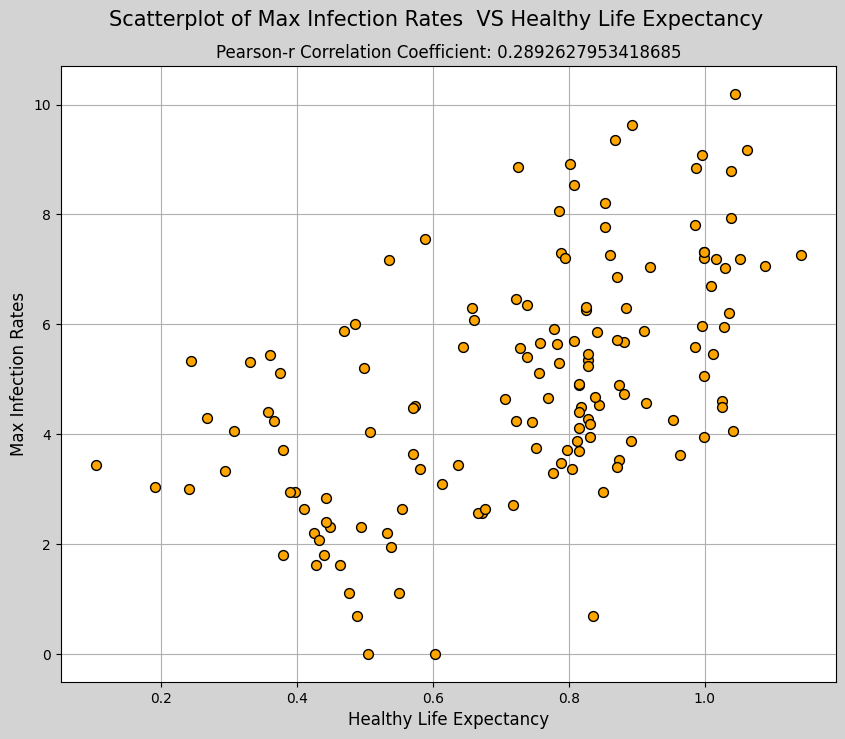

In [22]:
# The correlation table of the previous task showed some weak positive correlations
# We can further explore these using some Seaborn visualizations
# Lets start with max_infection_rates and Healthy life expectancy, which seem to share the strongest correlation
# (even though this is actually a weak correlation)
x = data["max_infection_rates"]
y = data["Healthy life expectancy"]
pearson_r, p_value = stats.pearsonr(data["max_infection_rates"], data["Healthy life expectancy"])

plt.figure(figsize=(10,8), facecolor="lightgrey")
# Using a log scale for max_infection_rates for better visualization
sns.scatterplot(x=y, y=np.log(x), color="orange", edgecolor="black", s=50, linewidth=1, zorder=2)
plt.xlabel("Healthy Life Expectancy", fontsize=12)
plt.ylabel("Max Infection Rates", fontsize=12)
plt.suptitle("Scatterplot of Max Infection Rates  VS Healthy Life Expectancy", fontsize=15, y=0.95)
plt.title("Pearson-r Correlation Coefficient: " + str(pearson_r))
plt.grid(zorder=1)
plt.show()

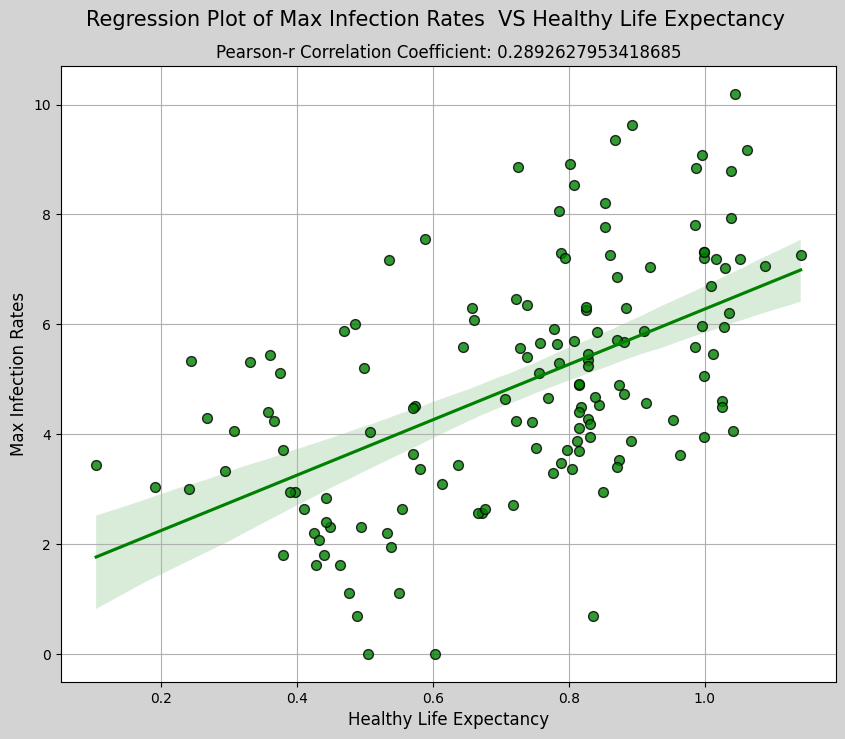

In [23]:
# We can use a Seaborn regplot to actually visualize the regression line too
plt.figure(figsize=(10,8), facecolor="lightgrey")
# Using a log scale for max_infection_rates for better visualization
sns.regplot(x=y, y=np.log(x), color="green", scatter_kws = {"edgecolor":"black", "s":50, "zorder":2})
plt.xlabel("Healthy Life Expectancy", fontsize=12)
plt.ylabel("Max Infection Rates", fontsize=12)
plt.suptitle("Regression Plot of Max Infection Rates  VS Healthy Life Expectancy", fontsize=15, y=0.95)
plt.title("Pearson-r Correlation Coefficient: " + str(pearson_r))
plt.grid(zorder=1)
plt.show()

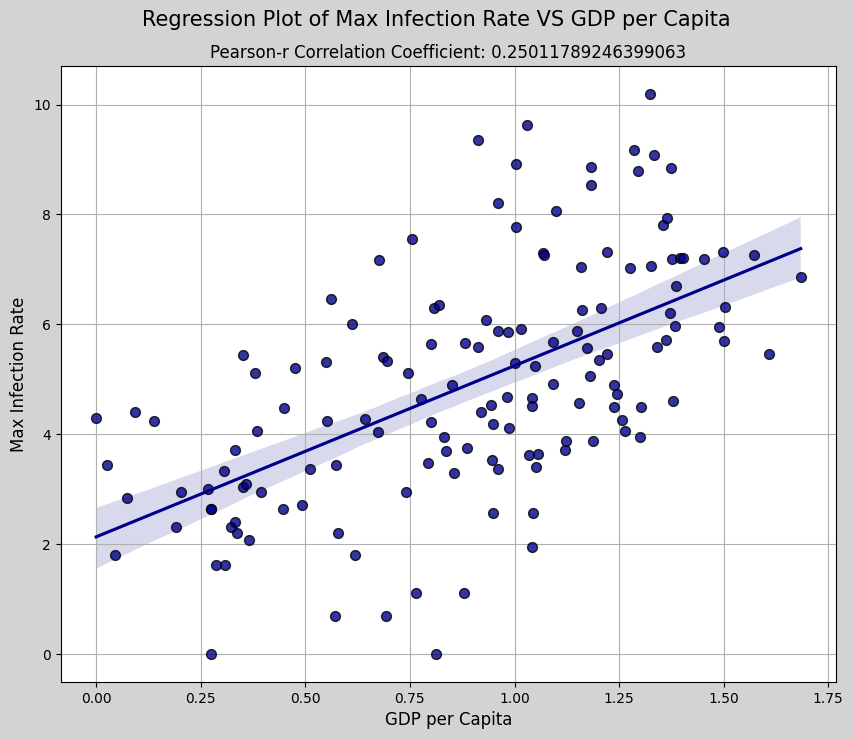

In [24]:
# Another weak to medium correlated feature couple is max_infection_rates and GDP per capita
x = data["GDP per capita"]
y = data["max_infection_rates"]
pearson_r, p_value = stats.pearsonr(x, y)

plt.figure(figsize=(10,8), facecolor="lightgrey")
sns.regplot(x=x, y=np.log(y), color="darkblue", scatter_kws={"edgecolor":"black", "s":50, "zorder":2})
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Max Infection Rate", fontsize=12)
plt.suptitle("Regression Plot of Max Infection Rate VS GDP per Capita", fontsize=15, y=0.95)
plt.title("Pearson-r Correlation Coefficient: " + str(pearson_r))
plt.grid(zorder=1)
plt.show()

### So the interesting observation we can make, is that there indeed seems to be a positive correlation between infection rate, and measures of population well being, such as GDP per Capita and Healthy Life Expectancy, although like I already mentioned, this is a weak to medium correlation. 
### (pearson r < 3)

### An interesting way to continue the analysis is to bring the covid19 death dataset into play.
### We can then look into similar potential correlations between features of all three datasets.

In [25]:
covid_deaths_csv = pd.read_csv("covid19_deaths_dataset.csv")
covid_deaths_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [26]:
covid_deaths_csv.shape

(266, 104)

In [27]:
covid_deaths_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [28]:
# So we have cummulative data about covid deaths around the world, ranging from 1/22/20 until 4/30/20
# Lets prepare the data like we did with the previous infection dataset
drop_columns = covid_deaths_csv[["Province/State", "Lat", "Long"]]
covid_deaths_df = covid_deaths_csv.drop(drop_columns, axis=1)
covid_deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,Albania,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,Andorra,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [29]:
covid_deaths_df.tail()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
264,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,Tajikistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
death_data_agg = covid_deaths_df.groupby("Country/Region").sum()
death_data_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


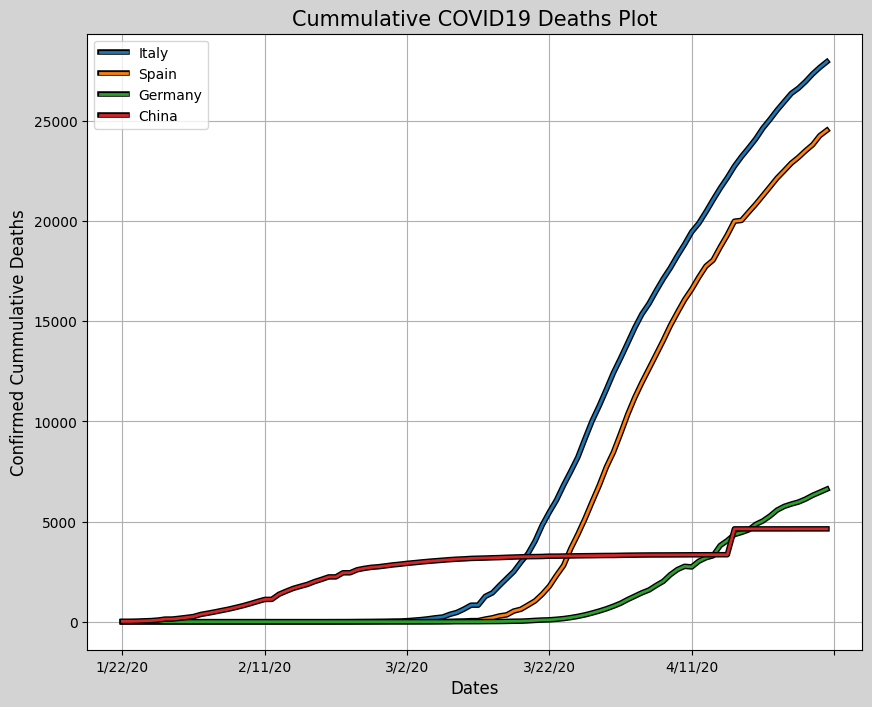

In [31]:
# Lets visualize the covid deaths progression in a few example countries, for the given time
plt.figure(figsize=(10,8), facecolor="lightgrey")
death_data_agg.loc["Italy"].plot(linewidth=2, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
death_data_agg.loc["Spain"].plot(linewidth=2, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
death_data_agg.loc["Germany"].plot(linewidth=2, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
death_data_agg.loc["China"].plot(linewidth=2, path_effects=[pe.withStroke(linewidth=4, foreground='black')])
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Confirmed Cummulative Deaths", fontsize=12)
plt.title("Cummulative COVID19 Deaths Plot", fontsize=15)
plt.legend()
plt.grid()
plt.show()

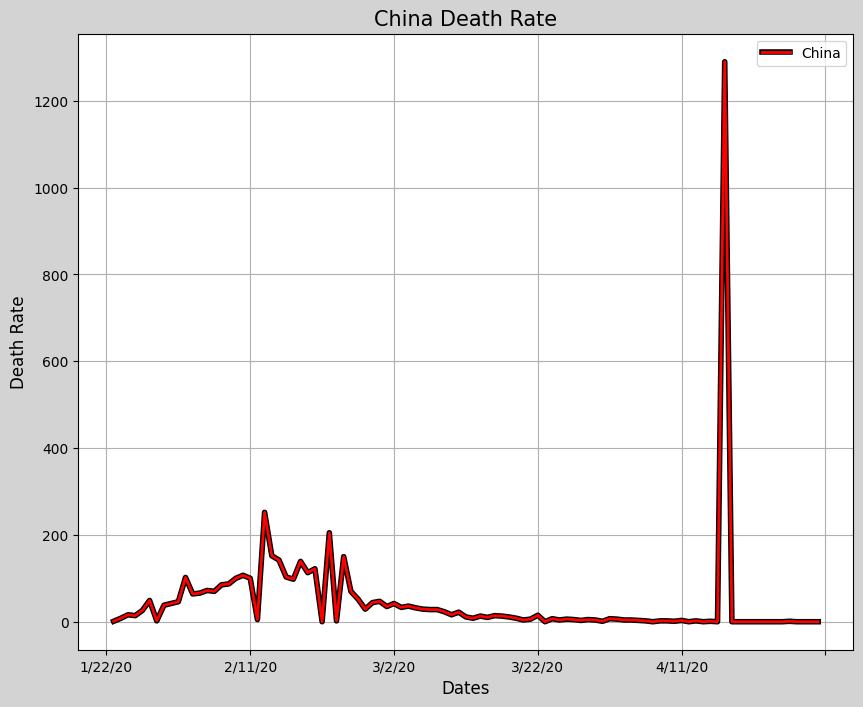

In [32]:
# Lets check out the death rate in China, as an example
plt.figure(figsize=(10,8), facecolor="lightgrey")
death_data_agg.loc["China"].diff().plot(linewidth=2, color="red", path_effects=[pe.withStroke(linewidth=4, foreground="black")])
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Death Rate", fontsize=12)
plt.title("China Death Rate", fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [33]:
# Lets check out the exact maximum number of deaths in a day, for a few example countries
china_max_deaths = death_data_agg.loc["China"].diff().max()
print("The maximum death rate recorded for China, was", china_max_deaths, "deaths in a single day.")

The maximum death rate recorded for China, was 1290.0 deaths in a single day.


In [34]:
spain_max_deaths = death_data_agg.loc["Spain"].diff().max()
print("The maximum death rate recorded for Spain, was", spain_max_deaths, "deaths in a single day.")

The maximum death rate recorded for Spain, was 961.0 deaths in a single day.


In [35]:
italy_max_deaths = death_data_agg.loc["Italy"].diff().max()
print("The maximum death rate recorded for Italy, was", italy_max_deaths, "deaths in a single day.")

The maximum death rate recorded for Italy, was 919.0 deaths in a single day.


In [36]:
# Now we need to calculate the max death rates, for all the countries in the database
# Lets create a list of the existing countries
countries = list(death_data_agg.index)
# Also, an empty list to append with the max infection rates as they are calculated
max_death_rates = []

# Now once again we use a simple loop to populate the max_infection_rates list
for c in countries:
    max_death_rates.append(death_data_agg.loc[c].diff().max())

# Now we will add the max_infection_rates list as a column in our data_agg dataframe
death_data_agg["max_death_rates"] = max_death_rates
death_data_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [37]:
# Once again, now that we have calculated the maximum death rates for each country, we dont need the cummulative data anymore
# we can create a new dataframe, keeping only the max_death_rates column
corona_death_data = death_data_agg[["max_death_rates"]]
corona_death_data.head()

,max_death_rates
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [38]:
# Now we will merge the two dataframes once more
# Lets start by ckecking the dimensions of each
print(corona_death_data.shape)
print(happiness_report_csv.shape)

(187, 1)
(156, 5)


In [39]:
# Lets join the two tables together
data = corona_death_data.join(happiness_report_csv, how="inner")
print(data.shape)
data.head()

(143, 6)


,max_death_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,3.203,0.350,0.517,0.361,0.000
Albania,4.0,4.719,0.947,0.848,0.874,0.383
Algeria,30.0,5.211,1.002,1.160,0.785,0.086
Argentina,13.0,6.086,1.092,1.432,0.881,0.471
Armenia,3.0,4.559,0.850,1.055,0.815,0.283


In [40]:
# And now we can check out some basic descriptive statistics and correlations
data.describe()

,max_death_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,71.657343,5.404343,0.892392,1.201986,0.728902,0.393748
std,226.234644,1.125503,0.401240,0.306334,0.230101,0.146585
min,0.000000,2.853000,0.000000,0.000000,0.105000,0.000000
25%,2.000000,4.541000,0.576000,1.036000,0.544500,0.300500
50%,5.000000,5.373000,0.960000,1.274000,0.789000,0.418000
75%,21.000000,6.178000,1.203500,1.447000,0.877500,0.508000
max,1440.000000,7.769000,1.684000,1.624000,1.141000,0.631000


In [41]:
data.corr()

,max_death_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rates,1.000000,0.258307,0.259893,0.204148,0.309666,0.080166
Score,0.258307,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.259893,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.587007,0.394603,0.456246,0.427892,1.000000


### We see a similar pattern, some interesting positive correlations between death rates and happiness metrics, even though once more the correlations are weak to medium.
### The most noticeable one is the way death rates seem to correlate with healthy life expectancy, with a pearson-r value of a little higher than 3.

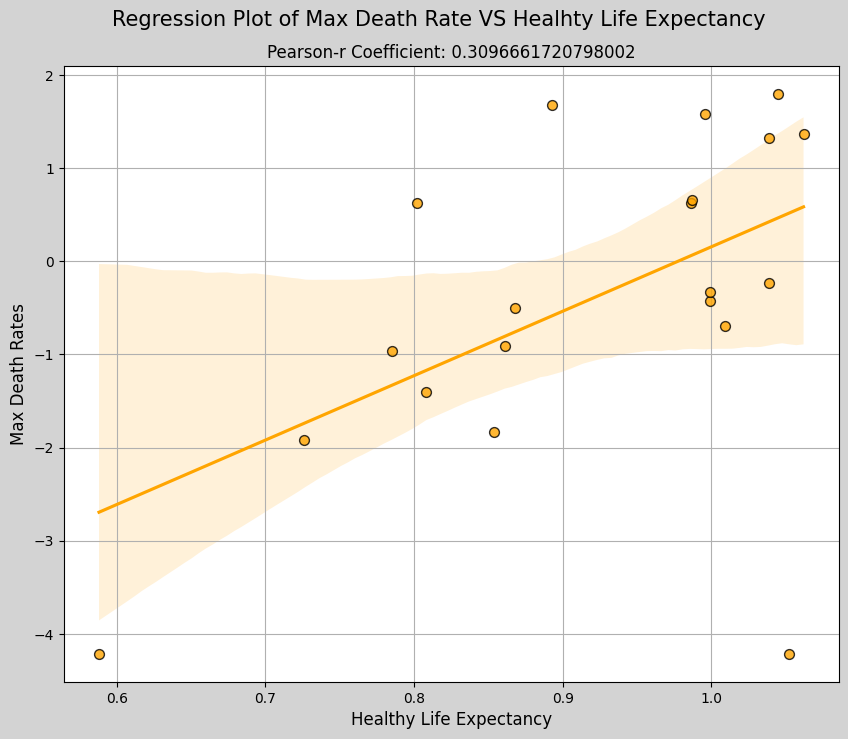

In [57]:
# Lets visualize this noticeable correlation
x = data["Healthy life expectancy"]
# Standaridize the max_death_rates column to avoid various errors due to difference in magnitude and existence of zeros
y = (data["max_death_rates"] - data["max_death_rates"].mean()) / data["max_death_rates"].std()

pearson_r, p_value = stats.pearsonr(x,y)

plt.figure(figsize=(10,8), facecolor="lightgrey")
sns.regplot(x=x, y=np.log(y), color="orange", scatter_kws={"edgecolor":"black", "s":50, "zorder":2})
plt.xlabel("Healthy Life Expectancy", fontsize=12)
plt.ylabel("Max Death Rates", fontsize=12)
plt.title("Pearson-r Coefficient: " + str(pearson_r))
plt.suptitle("Regression Plot of Max Death Rate VS Healhty Life Expectancy", fontsize=15, y=0.95)
plt.grid(zorder=1)
plt.show()

In [62]:
# Another way to approach this, is to check and remove the zero entries of the max_death_rates column
# As long as they are not too many to skew the results, of course
# We see that the pearson-r coefficient remains almost the same
non_zero_data = data[data["max_death_rates"]!=0]
non_zero_data

,max_death_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,3.203,0.350,0.517,0.361,0.000
Albania,4.0,4.719,0.947,0.848,0.874,0.383
Algeria,30.0,5.211,1.002,1.160,0.785,0.086
Argentina,13.0,6.086,1.092,1.432,0.881,0.471
Armenia,3.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Uzbekistan,1.0,6.174,0.745,1.529,0.756,0.631
Venezuela,6.0,4.707,0.960,1.427,0.805,0.154
Yemen,2.0,3.380,0.287,1.163,0.463,0.143
Zambia,1.0,4.107,0.578,1.058,0.426,0.431


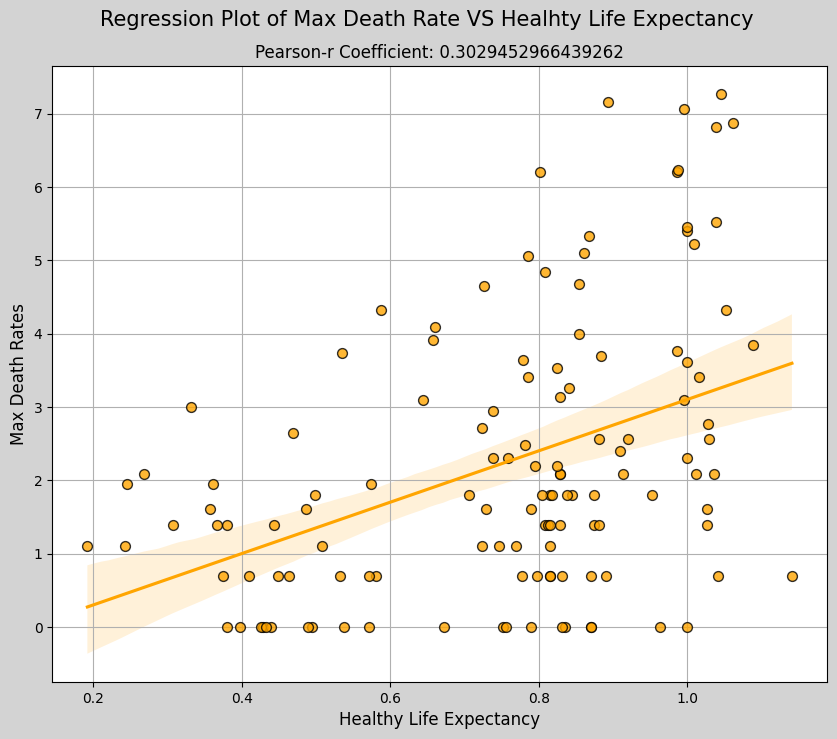

In [63]:
x = non_zero_data["Healthy life expectancy"]
y = non_zero_data["max_death_rates"]

pearson_r, p_value = stats.pearsonr(x,y)

plt.figure(figsize=(10,8), facecolor="lightgrey")
sns.regplot(x=x, y=np.log(y), color="orange", scatter_kws={"edgecolor":"black", "s":50, "zorder":2})
plt.xlabel("Healthy Life Expectancy", fontsize=12)
plt.ylabel("Max Death Rates", fontsize=12)
plt.title("Pearson-r Coefficient: " + str(pearson_r))
plt.suptitle("Regression Plot of Max Death Rate VS Healhty Life Expectancy", fontsize=15, y=0.95)
plt.grid(zorder=1)
plt.show()

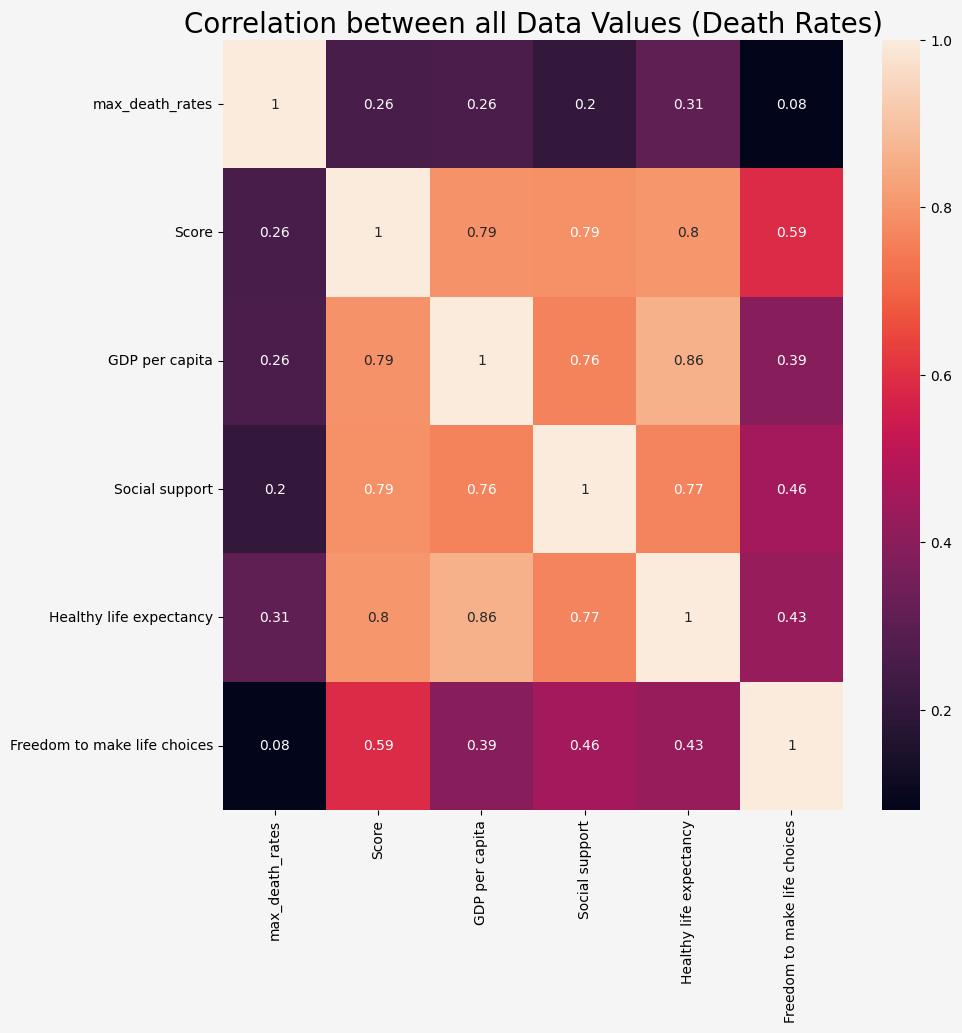

In [67]:
# Finally, we can use a Seaborn heatmap to visualize all the pairwise correlations
plt.figure(figsize=(10,10), facecolor="whitesmoke")
ax = sns.heatmap(data.corr(), annot=True, cmap="rocket")
ax.set_title("Correlation between all Data Values (Death Rates)", fontsize=20)
plt.show()